In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [29]:
df = pd.read_csv("../Data/BankChurners.csv")
print(df.shape)
df.head()

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,1,45,1,3,2,3,0,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0
1,818770008,1,49,0,5,4,1,0,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0
2,713982108,1,51,1,3,4,4,0,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0
3,769911858,1,40,0,4,2,1,0,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1
4,709106358,1,40,1,3,1,3,0,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,1,0,0


In [30]:
# Define the features (X) 
X = df[['Attrition_Flag','Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
        'Marital_Status_Unknown',"Marital_Status_Single","Marital_Status_Married", 'Income_Category', 'Card_Category', 'Months_on_book',
        'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
        'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

#### Elbow Method:

- Fit K-Means clustering for a range of values of k (e.g., from 1 to 10).
- Calculate the sum of squared distances (inertia) from each point to its assigned cluster center for each k.
- Plot the inertia values for different values of k.
- Look for the "elbow point" in the plot, where the rate of decrease in inertia starts to slow down. This point is often a good estimate of the optimal k.

d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

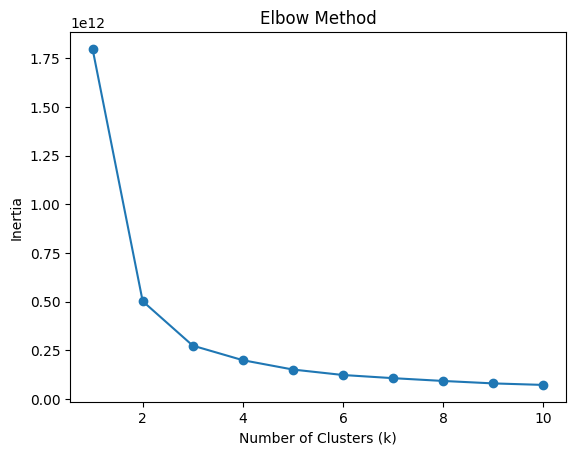

In [31]:


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [32]:
# Initialize the K-Means model with k=5
kmeans = KMeans(n_clusters=5, random_state=0)
# Fit the K-Means model to your data
kmeans.fit(X)
# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_


d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
# Add the cluster assignments to your DataFrame
df['Cluster'] = cluster_assignments

# Access cluster centers
cluster_centers = kmeans.cluster_centers_

In [34]:
# Calculate the percentage of "Existing Customer" in each cluster
cluster_Existing_percentage = (df.groupby('Cluster')['Attrition_Flag'].mean() * 100).sort_values()

# Display the cluster percentages
print(cluster_Existing_percentage)

Cluster
3    82.356077
0    83.102446
2    83.695652
1    87.354086
4    92.153285
Name: Attrition_Flag, dtype: float64


d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

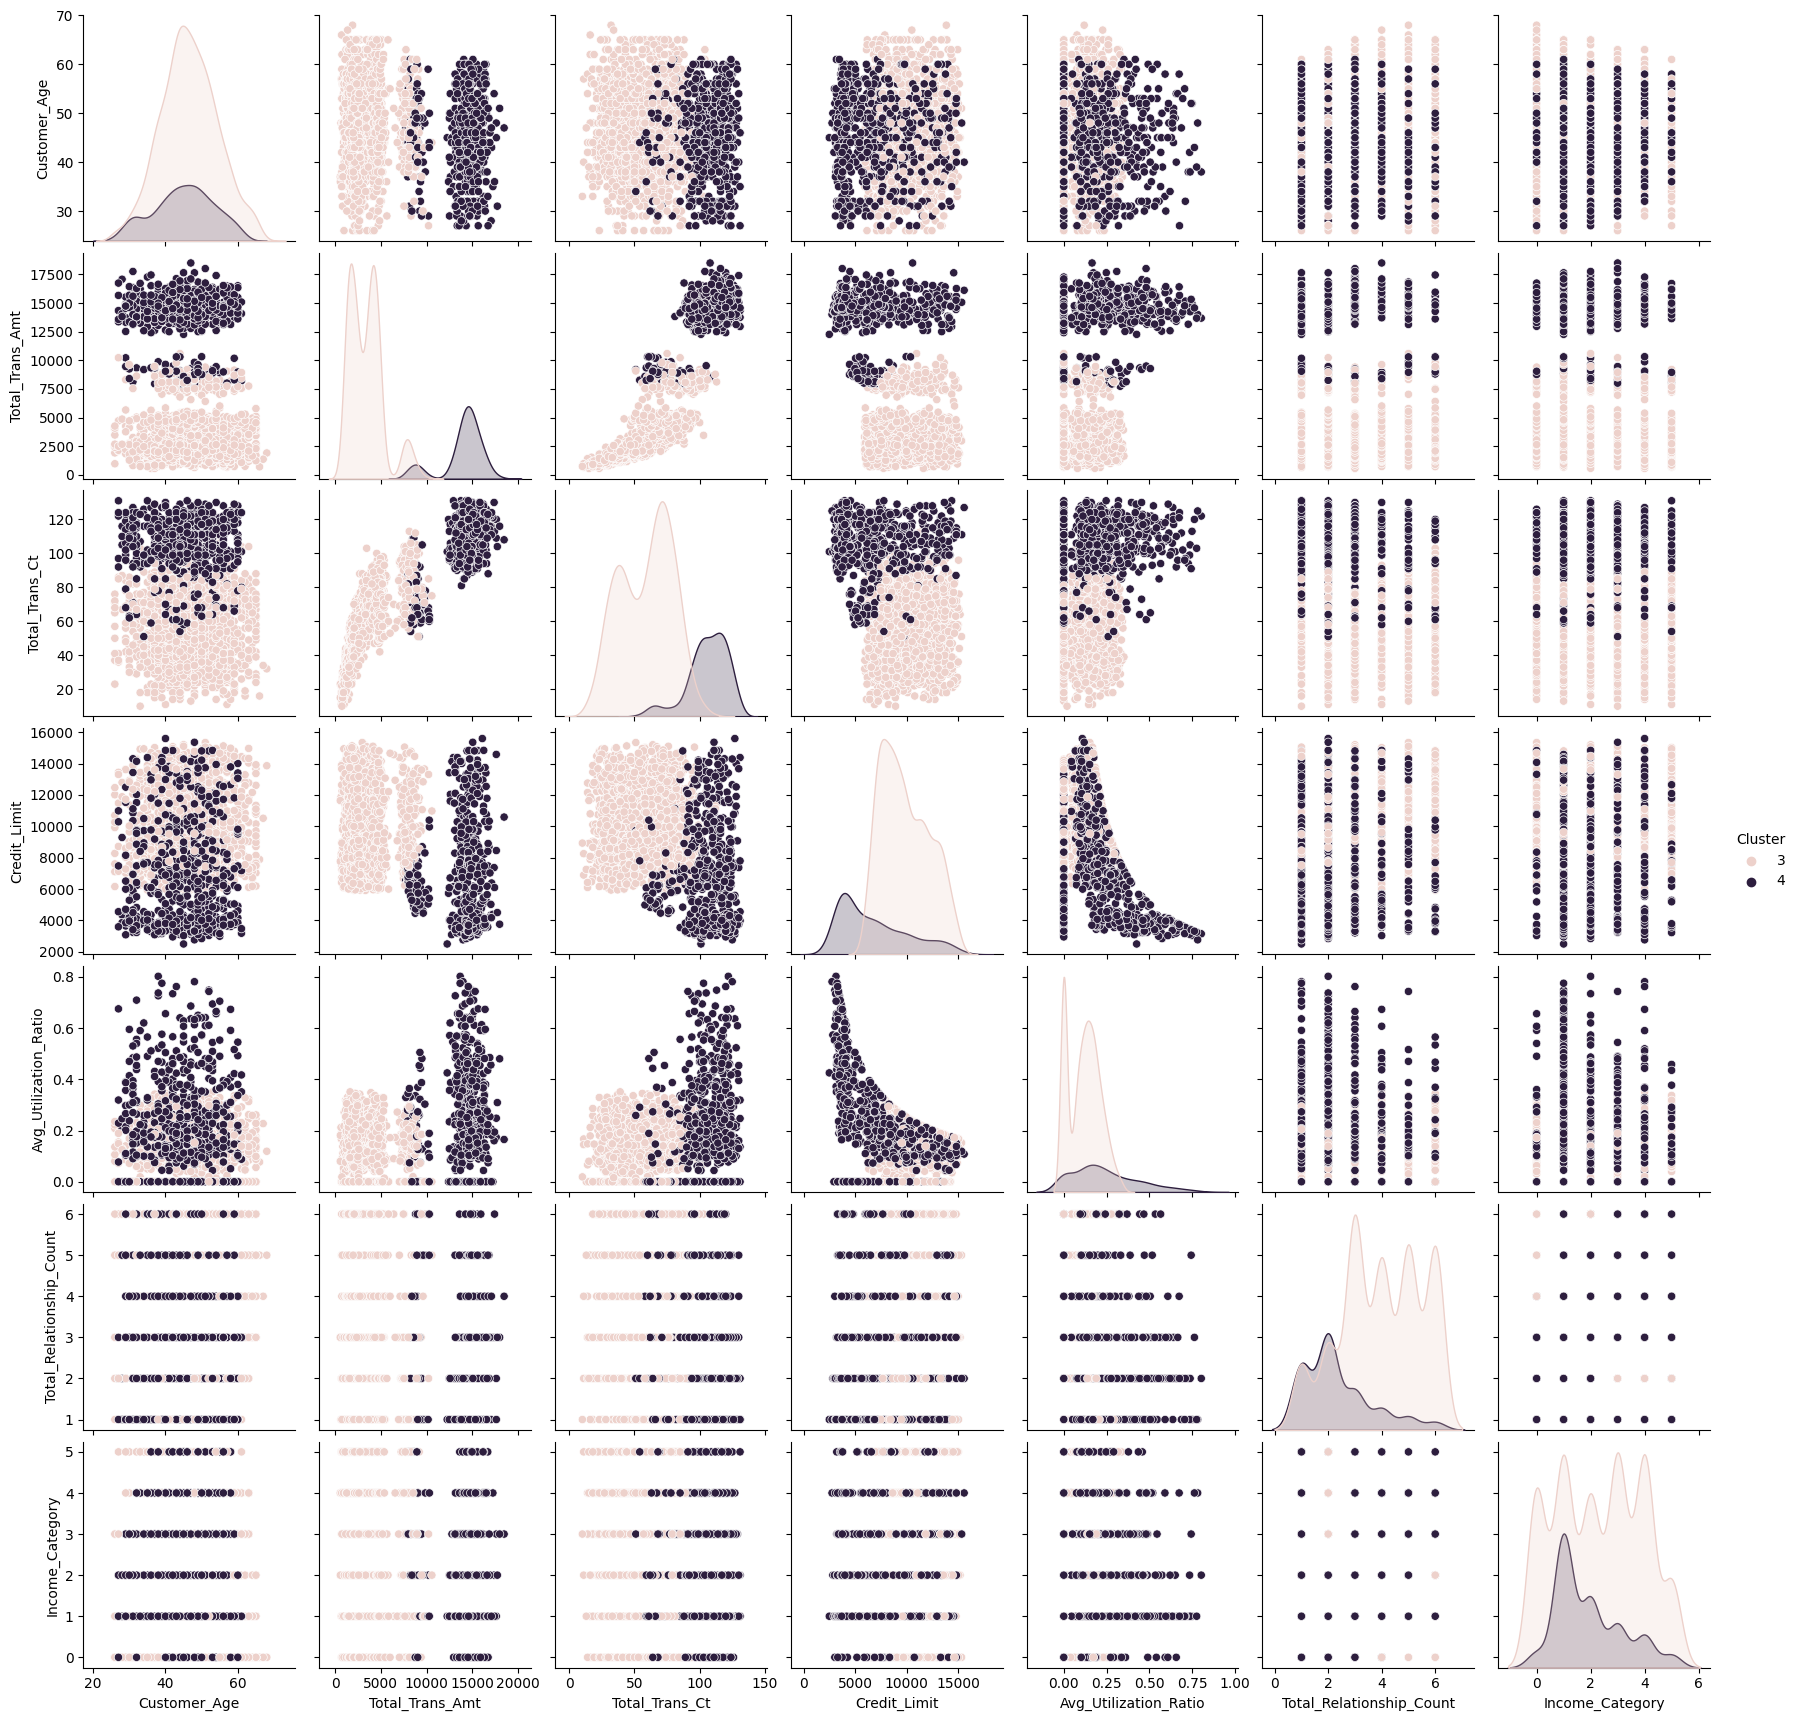

In [35]:


# Select the features for pair plots
selected_features = ['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Relationship_Count', 'Income_Category']

# Filter the DataFrame to include only rows with Cluster values 3 or 4
filtered_df = df[df['Cluster'].isin([3, 4])]

# Create a pair plot for selected features within the filtered DataFrame
sns.pairplot(filtered_df, vars=selected_features, hue='Cluster')

# Show the pair plot
plt.show()


### Analysis of Clusters 3 and 4:

In your clustering analysis, you identified that Cluster 3 has the highest percentage of attrited customers (those who closed their accounts), while Cluster 4 has the lowest percentage of attrited customers (mostly existing customers). The pair plot analysis revealed distinct differences between these two clusters, shedding light on potential reasons for attrition.

##### Cluster 3 (Higher Attrition):

**Higher Total Transaction Amount (Total_Trans_Amt)**: Customers in Cluster 3, who have a higher attrition rate, exhibit significantly higher total transaction amounts. This suggests that customers who conduct more transactions may still be prone to closing their accounts.

**Higher Total Transaction Count (Total_Trans_Ct)**: Similar to the total transaction amount, Cluster 3 also shows a higher total transaction count. This implies that customers who engage in more transactions are still leaving the bank, despite their high transaction activity.

**Lower Credit Limit (Credit_Limit)**: Notably, Cluster 3 customers have lower credit limits on their accounts compared to other clusters. A lower credit limit might indicate that these customers have been assigned less credit by the bank, which could contribute to their attrition.

To retain more customers in Cluster 3, consider customized strategies such as adjusting credit limits, offering targeted promotions, and providing enhanced customer support. These actions can address the specific needs and concerns of this customer group.